## Learning Subimage state
This notebook will have the code to create subimages from the 100x100 current maps and the probability vectors.
The learning problem will be to to learn the probability vector of the subimage amongst the device states.

In [147]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import tensorflow as tf
import datetime

## Creating the subimages

In [138]:
data_path = "/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/"
files = glob.glob(data_path + "*.npy")
print(len(files))

1060


In [139]:
def create_subimage(image,size):
    x = np.random.randint(0,image.shape[0] - size)
    y = np.random.randint(0,image.shape[1] - size)
    subimage = image[x:(x + size),y:(y+size)]
    return x,y,subimage

def create_subimage_from_file(dat,size = 30):
    V_P1_vec = dat['V_P1_vec']
    N_v = len(V_P1_vec)
    current = np.array([x['current'] for x in dat['output']]).reshape(N_v,N_v)
    state = np.array([x['state'] for x in dat['output']]).reshape(N_v,N_v)
    
    size = 30
    x,y,subimage = create_subimage(current,size)
    prob,bins = np.histogram(state[x:(x+size),y:(y+size)],bins=[-1,0,1,2,3],density=True) 
    return subimage,prob


def save_subimage(subimage, prob, subimage_path):
    result = {"subimage" : subimage,"prob" : prob }
    np.save(subimage_path + datetime.datetime.now().strftime("%Y%m%d-%H%M%S%f"),result)
    return




Test of the subimage creation routines

Prob vector = [ShortCircuit, QPC, SD, DD]
 [ 0.    0.    0.38  0.62]


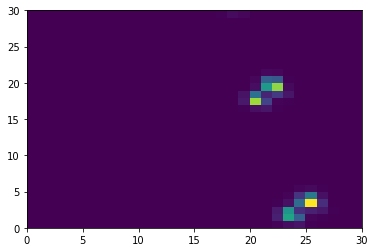

In [140]:
dat = np.load(files[0]).item()
subimage,prob = create_subimage_from_file(dat)
plt.pcolor(subimage)
print("Prob vector = [ShortCircuit, QPC, SD, DD]\n",prob)

Create $\texttt{n_sub}$ images from each file and save them in $\texttt{subimage_path}$

In [141]:
n_sub = 40
subimage_path = "/Users/sandesh/data/QFlow/data_for_paper/subimages/" 
# loops for simplicity
for file in files[:]:
    dat = np.load(file).item()
    print(file)
    for i in range(n_sub):
        subimage,prob = create_subimage_from_file(dat)
        save_subimage(subimage, prob, subimage_path)

/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044026782321.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043146928944.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-041845946653.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044507179086.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042357210822.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044421737783.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-041749666414.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044919453638.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044557024025.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043621930775.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-041944013960.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_lo

/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044358712896.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043159558959.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-041753245542.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044153205679.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042623723790.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043921207796.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043943699671.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042552577044.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043047960107.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043302986093.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-045006456596.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_lo

/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044657288049.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043223340651.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043901469104.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043024189094.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042756320252.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042356023213.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042754834529.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042623937850.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043457184946.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043718504680.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-041722557686.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_lo

/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043754884672.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043558601977.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044155453777.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043438133286.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044347942438.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043837272967.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043453811468.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044251585138.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042542252468.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044012597636.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042457264074.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_lo

/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-041818407626.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043649617945.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043540742757.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043026206089.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043457000952.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042444163064.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042923979080.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042736939423.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044521626524.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043143946601.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042752551991.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_lo

/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044149821210.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043516128470.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042506452168.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-045024587413.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043526107674.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043046224782.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043757464840.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-041954671386.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044908897853.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042426382122.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042543036904.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_lo

/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042204397006.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-045132700083.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043018233229.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044705524425.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043524022446.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043856677526.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042714960786.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042447391514.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044344425606.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042044828293.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042718560804.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_lo

/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043621496191.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042951780010.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044353404405.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044221596663.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042830231199.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-041917098310.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042908985527.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043300578299.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042446742872.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044058793946.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043208895739.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_lo

/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-041916678899.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044054240872.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044921349975.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-041939210714.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044235725850.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043921935063.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042106179080.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042548633318.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042038791446.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-041905521893.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-041822667625.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_lo

/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044914915602.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042110397599.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042153318222.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042423952174.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042235549513.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043759184927.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043933442048.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043940378453.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043023352443.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044639272275.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042309962479.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_lo

/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-045032725544.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043831990551.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043417119811.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043554998439.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043926348598.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042531065068.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-043533820871.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044300158726.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-045029404189.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042822492141.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044429129451.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_lo

/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042605235795.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044622371883.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-044508583555.npy
/Users/sandesh/data/QFlow/data_for_paper/double_dot_low_var/20171123-042905147251.npy


## Creating the CNN

### Loading of the subimage data
First I will load the data from subimages into a single array. The path is given by subimage_path.

In [148]:
subimage_path = "/Users/sandesh/data/QFlow/data_for_paper/subimages/" 
files = glob.glob(subimage_path + "*.npy")
inp_array = []
out_array = []
for file in files:
    dat = np.load(file).item() 
    inp_array.append(dat['subimage'])
    out_array.append(dat['prob'])
inp_array = np.array(inp_array)
out_array = np.array(out_array)

Divide the dataset into training and test data

In [175]:
# determines the number of inputs used as the training set
# the rest are treated as a test set
train_factor = 0.9

n_tot = inp_array.shape[0]
n_train = int(train_factor*n_tot)
n_test = n_tot - n_train

# input parameters
n_inp = inp_array[0].shape[0] 
n_out = out_array[0].shape[0] 
print("Number of inputs:", n_inp)
print("Number of outputs:", n_out)

x_train_data = 1e4*inp_array[:n_train]
y_train_data = out_array[:n_train]
x_test_data = 1e4*inp_array[n_train:]
y_test_data = out_array[n_train:]

print("Total, Training, Test")
print(n_tot, n_train, n_test)

Number of inputs: 30
Number of outputs: 4
Total, Training, Test
53270 47943 5327


Define the model function for the CNN. Details about the neural network inlcuding number of layers are defined here.

In [195]:
from tensorflow.contrib import learn
from tensorflow.contrib.learn.python.learn.estimators import model_fn as model_fn_lib

# application logic will be added here
def cnn_model_fn(features,labels,mode):
    '''Model function for CNN'''
    #input layer
    input_layer = tf.cast(tf.reshape(features["x"],[-1,30,30,1]),tf.float32)
    
    conv1 = tf.layers.conv2d(inputs=input_layer,
                            filters=16,
                            kernel_size=[5,5],
                            padding="same",
                            activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2],strides=2)
    
    #conv2 = tf.layers.conv2d(inputs=pool1,
    #                        filters=16,
    #                        kernel_size=[5,5],
    #                        padding="same",
    #                        activation=tf.nn.relu)
    #pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2],strides=2)
    
    flat = tf.contrib.layers.flatten(inputs=pool1)
    # dense output layer
    out1 = tf.layers.dense(inputs=flat,units=1024,activation=tf.nn.relu)  
    dropout1 = tf.layers.dropout(
      inputs=out1, rate=0.5, training=mode == learn.ModeKeys.TRAIN)
    
    #out2 = tf.layers.dense(inputs=dropout1,units=256,activation=tf.nn.relu)  
    #dropout2 = tf.layers.dropout(
    #  inputs=out2, rate=0.5, training=mode == learn.ModeKeys.TRAIN)
    
    out = tf.layers.dense(inputs=dropout2, units=4)
    
    loss = None

    # Calculate loss( for both TRAIN AND EVAL modes)
    if mode != learn.ModeKeys.INFER:
        loss = tf.losses.mean_squared_error(labels=labels, predictions=out)

    # Configure the training op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer()
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    # Generate predictions
    predictions= {
        "prob" : out,
        "states" : tf.argmax(out,axis=1)
    }
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)


    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=tf.argmax(labels,axis=1), predictions=predictions["states"])}
    
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

Define the training input and test input functions. The batch size is set here and number of steps in training is set here.

In [196]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x" : x_train_data},
      y=y_train_data,
      num_epochs=1,
      batch_size=128,
      shuffle=False)
test_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x" : x_test_data},
      y=y_test_data,
      num_epochs=1,
      shuffle=False)

Train the CNN over number of steps.

In [197]:
model_dir = "/Users/sandesh/trained_networks/substate_classifier"
substate_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn)
substate_classifier.train(input_fn=train_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_is_chief': True, '_save_checkpoints_secs': 600, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11dd17f98>, '_tf_random_seed': None, '_task_type': 'worker', '_master': '', '_save_summary_steps': 100, '_num_worker_replicas': 1, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_session_config': None, '_task_id': 0, '_num_ps_replicas': 0, '_model_dir': '/var/folders/4f/dzjlj30x1bv7zk7rdkyspqmc0000gn/T/tmpprlrv0as', '_log_step_count_steps': 100}


NameError: name 'dropout2' is not defined

### Evaluate the accuracy on the test set

In [185]:
eval_results = substate_classifier.evaluate(input_fn=test_input_fn,steps=1)
print(eval_results)

INFO:tensorflow:Starting evaluation at 2017-11-28-03:20:51
INFO:tensorflow:Restoring parameters from /var/folders/4f/dzjlj30x1bv7zk7rdkyspqmc0000gn/T/tmpdco2lhb6/model.ckpt-375
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-11-28-03:20:52
INFO:tensorflow:Saving dict for global step 375: accuracy = 0.960938, global_step = 375, loss = 0.00308243
{'loss': 0.0030824267, 'global_step': 375, 'accuracy': 0.9609375}


Now the CNN has been trained, I will use it to make predictions on the test data. A random sample and its probability vector will be tested.

In [193]:
predictions = list(substate_classifier.predict(input_fn=test_input_fn))

INFO:tensorflow:Restoring parameters from /var/folders/4f/dzjlj30x1bv7zk7rdkyspqmc0000gn/T/tmpdco2lhb6/model.ckpt-375


3


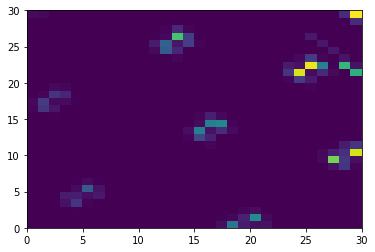

In [194]:
index = np.random.randint(len(predictions))
plt.figure(1)
plt.pcolor(x_test_data[index])
print(predictions[index]['states'])